**1. Import Necessary Libraries**

In [ ]:
from sklearn.metrics import root_mean_squared_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from scipy.stats import skew
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import math

**2. To read the data into Python.**

In [ ]:
df = pd.read_csv('Carseats.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


----
### `a. Fit a multiple regression model to predict Sales using Price, Urban, and US.`

----

### **DATA CLEANING**

**3. Check For any missing Values**

In [6]:
print(df.isnull().sum())

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


**4. Check for any duplicate entries**

In [7]:
print(df.duplicated().sum())

0


In [8]:
numerical_cols = df.select_dtypes(include=np.number).columns
print(numerical_cols)

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')


**5. Dealing with Inconsistent Data**

In [9]:
for col in numerical_cols:
    invalid = df[df[col] < 0]

    if not invalid.empty:
        print(f"Invalid (negative) values found in '{col}':\n", invalid)
        print("-" * 30)

**6. Check for Data Types**

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB
None


---
**SUMMARY OF DATA CLEANING**

----
- No missing values.
- No duplicate records.
- No negative values in any attributes.

### **DESCRIPTIVE STATISTICAL ANALYSIS**

**7. To produce a numerical summary of the variables in the data set.**

In [11]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


**8. Coefficient Of Variation**

In [12]:
print("--- Coefficient of Variation (CV) ---")
for col in numerical_cols:
    mean = df[col].mean()
    std = df[col].std()
    if mean != 0:
        cv = (std / mean) * 100
        print(f"CV for {col}: {cv:.2f}%")
    else:
        print(f"CV for {col}: Mean is zero, cannot calculate CV.")

--- Coefficient of Variation (CV) ---
CV for Sales: 37.67%
CV for CompPrice: 12.27%
CV for Income: 40.76%
CV for Advertising: 100.23%
CV for Population: 55.65%
CV for Price: 20.45%
CV for Age: 30.38%
CV for Education: 18.85%


**9. Median and Mode**

In [13]:
print("--- Median and Mode ---")
for col in numerical_cols:
    median = df[col].median()
    mode = df[col].mode()
    mean = df[col].mean()
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    if not mode.empty:
        print(f"  Mode: {', '.join(mode.astype(str).tolist())}")
    else:
        print("  Mode: No unique mode found (or multiple modes)")

--- Median and Mode ---
Sales:
  Mean: 7.50
  Median: 7.49
  Mode: 7.8
CompPrice:
  Mean: 124.97
  Median: 125.00
  Mode: 121
Income:
  Mean: 68.66
  Median: 69.00
  Mode: 69
Advertising:
  Mean: 6.63
  Median: 5.00
  Mode: 0
Population:
  Mean: 264.84
  Median: 272.00
  Mode: 125, 148, 170, 220, 237, 276, 497
Price:
  Mean: 115.80
  Median: 117.00
  Mode: 120, 128
Age:
  Mean: 53.32
  Median: 54.50
  Mode: 62
Education:
  Mean: 13.90
  Median: 14.00
  Mode: 12, 17


**10. Skewness Coefficient**

In [14]:
print("--- Skewness Coefficient ---")
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"Skewness for {col}: {skewness:.2f}")
    if skewness > 0.5:
        print(f"  - {col} is right-skewed.")
    elif skewness < -0.5:
        print(f"  - {col} is left-skewed.")
    elif skewness >= -0.5 and skewness <= 0.5:
        print(f"  - {col} is fairly symmetrical.")
    else:
        print(f"  - {col} shows moderate skewness.")

--- Skewness Coefficient ---
Skewness for Sales: 0.19
  - Sales is fairly symmetrical.
Skewness for CompPrice: -0.04
  - CompPrice is fairly symmetrical.
Skewness for Income: 0.05
  - Income is fairly symmetrical.
Skewness for Advertising: 0.64
  - Advertising is right-skewed.
Skewness for Population: -0.05
  - Population is fairly symmetrical.
Skewness for Price: -0.13
  - Price is fairly symmetrical.
Skewness for Age: -0.08
  - Age is fairly symmetrical.
Skewness for Education: 0.04
  - Education is fairly symmetrical.


----
**SUMMARY OF DESCRIPTIVE STATISTICAL ANALYSIS**

----

* Coefficient of Variation of attribute `Advertising`, `Population` & `Income` is higher (>40),
* comparison of Mean, Median and Mode:
    - For `Advertising`, Mean > Median -> Right-skewed.
    - For `Population`, Mean < Median -> Left-skewed.
    - Others show very slight skewness.
* Skewness Coefficient for the attribute `Advertising` further shows their values are higher than 0.5

We conclude that most variables are close to symmetrical, with `Advertising` being the notable exception.

### **EXPLORATORY DATA ANALYSIS**

**11. Univariate Analysis: Analysis on numerical Variables**

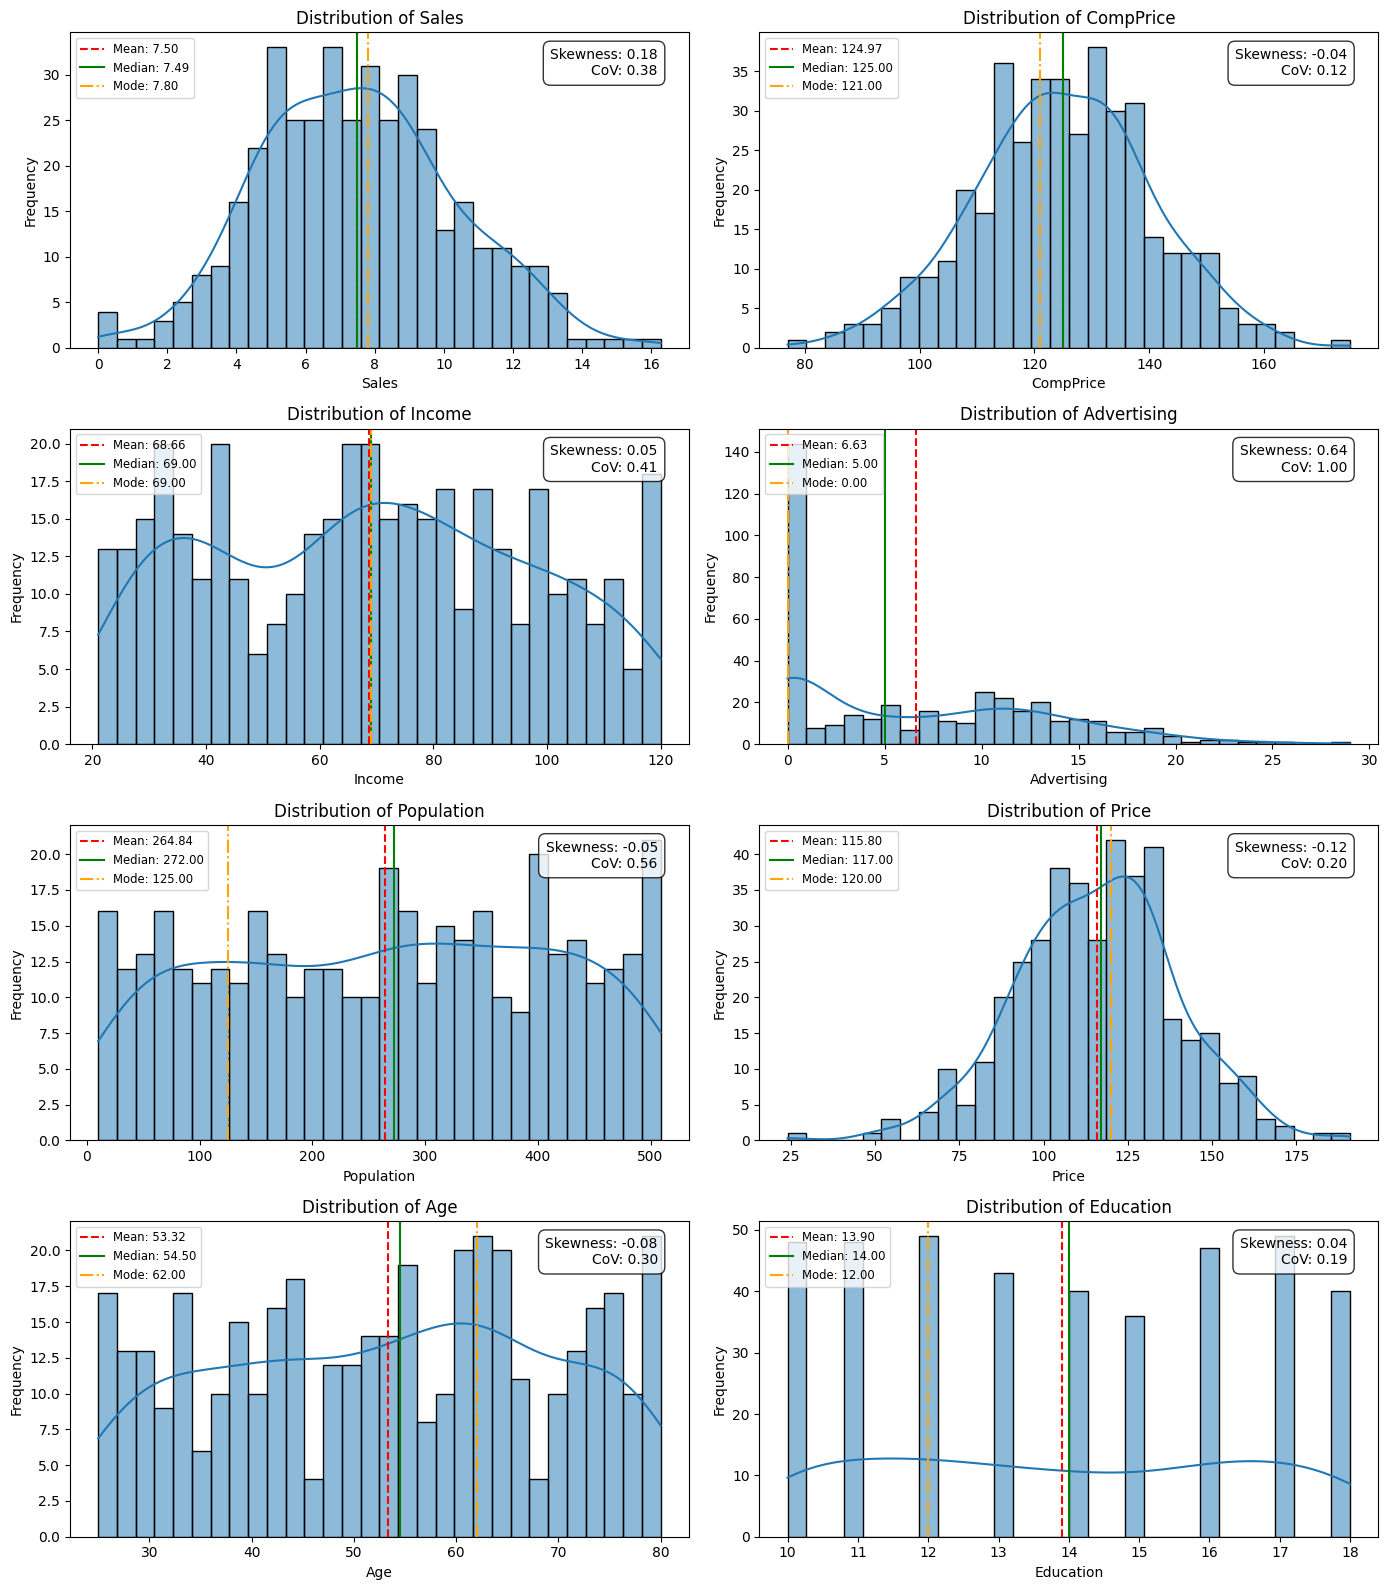

In [15]:
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)

    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode()[0] if not df[col].mode().empty else None
    std_dev = df[col].std()

    skewness = skew(df[col], nan_policy='omit') # used scipy's skewness to get a unbiased version of skewness
    cov = (std_dev / mean) if mean != 0 else np.inf

    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    plt.axvline(mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
    if mode is not None:
        plt.axvline(mode, color='orange', linestyle='-.', label=f'Mode: {mode:.2f}')

    stats_text = f"Skewness: {skewness:.2f}\n" \
                 f"CoV: {cov:.2f}"

    plt.legend(loc='upper left', fontsize='small')
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes, fontsize=10,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

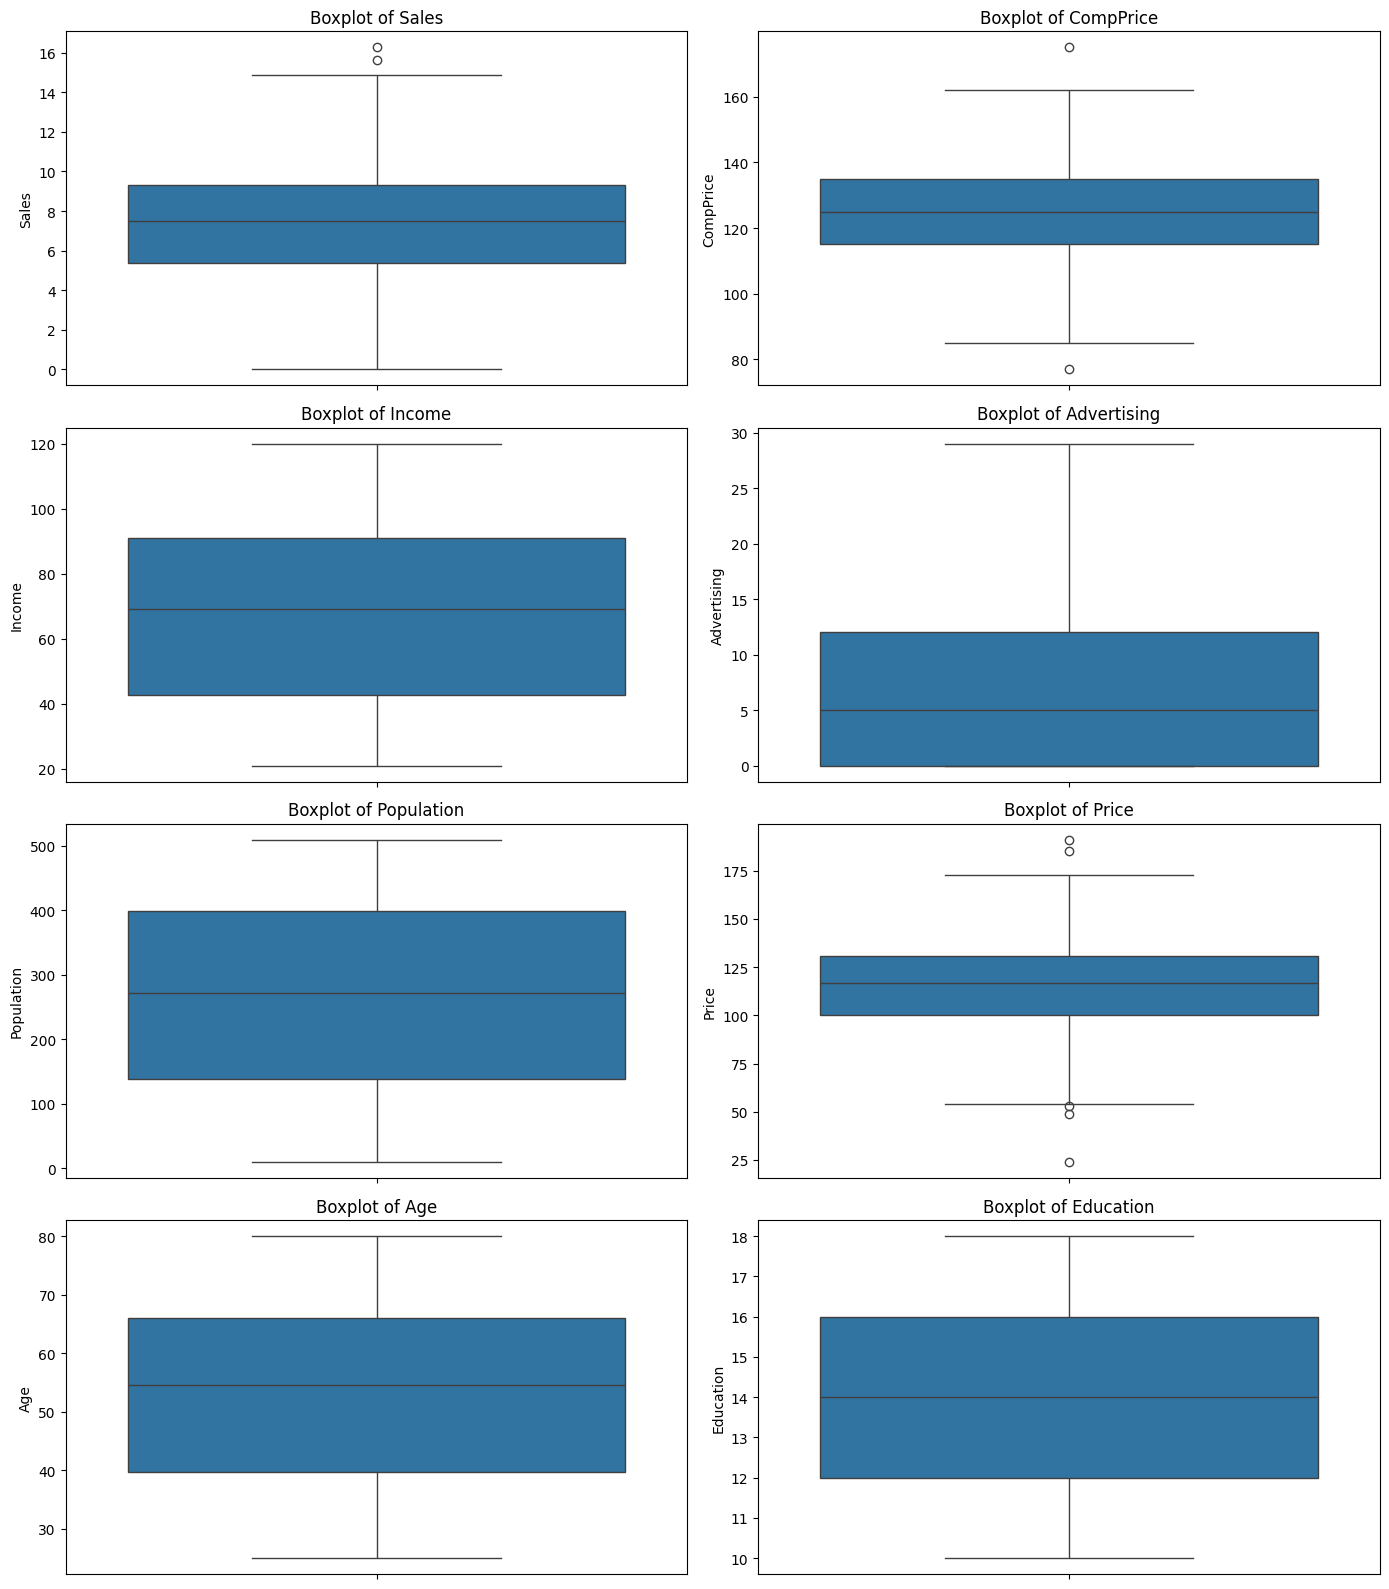

In [16]:
nrows = math.ceil(len(numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Conclusion of Univariate Analysis**

* `Advertising` attribute is a positive right skewed attribute since it has a long tail at the right with most of the data clustered near zero.
* `Age`, `Population`, and `Income` has multiple peaks, showing multi-modality characteristic, likely to suggest feature engineer (e.g., if age has 2 peaks at 20 and 50, so can have age group representing middle-aged or senior) or clustering.
* Other features are symmetrically distributed.
* `CompPrice` has only 2 outliers (0.5% of total records) and `Price` has only 5 outliers (1.25% of total records). This is too small proportion to cause impact on models.

**12. Explore Relationship between variables: Correlation Coefficient Heatmap**

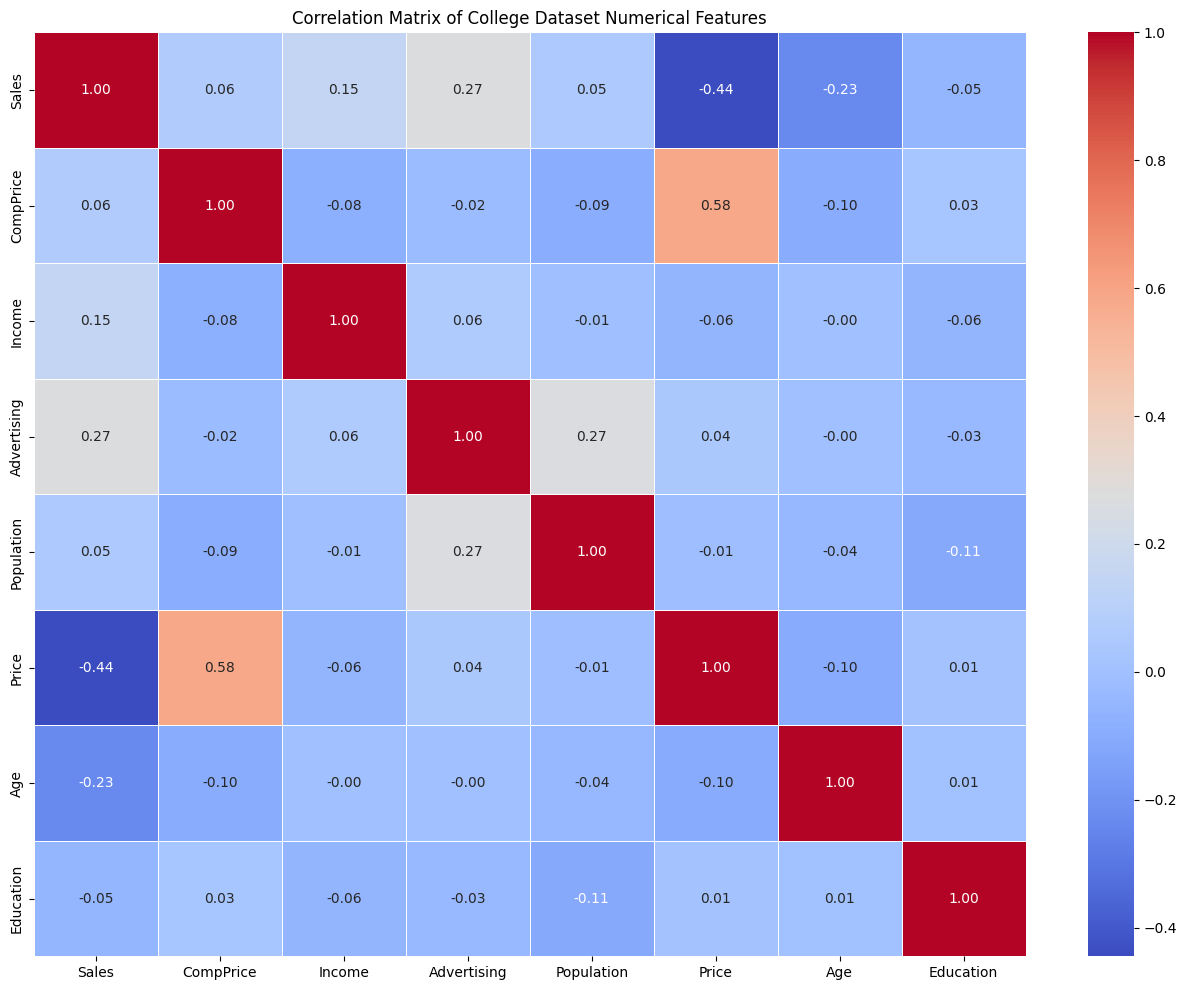

In [17]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of College Dataset Numerical Features')
plt.show()

**Conclusion of Correlation Coefficient Heatmap**

* `Price` vs. `CompPrice` (0.58): This is a strong positive correlation. It makes sense: the price of your product is strongly correlated with the price of a competitor's product.
* `Sales` vs. `Price` (-0.44): This shows a moderate negative correlation. As the price of your product goes up, sales tend to go down. This is a classic supply-and-demand relationship.

-----
**SUMMARY OF EDA:**

-----
- To Handle Outliers: [`CompPrice`, `Price`]
    - Do nothing
- Feature Transformation:
    - `Advertising` needs log transformation to be applied on it.
- Feature Engineering:
    - Use clustering algorithm to find groups on `multi-modal` features and create attributes.

### **DATA PREPROCESSING**

**13. Encode Categorical Variable**

In [18]:
le = LabelEncoder()
df['ShelveLoc'] = le.fit_transform(df['ShelveLoc'])
df['Urban'] = le.fit_transform(df['Urban'])
df['US'] = le.fit_transform(df['US'])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


* In `ShelveLoc` attribute, Bad, Good, Medium is represented as 0, 1, 2. The model will assume that the difference in `ShelveLoc` between a Good (1) and a Medium (2) is the same as the difference in `ShelveLoc` between a Medium (2) and a Bad (3). But is this not true. These are just categories, and the "distance" between them isn't a fixed number. By using label encoding, we're forcing a numerical relationship on something that isn't numerical.
* But we don't use `SheveLoc` (where one-hot encoding is a better choice).
* The variables (`Urban` and `US`) are binary. So label encoding works here.
* When label encoding is used on a binary variable (e.g., Yes=1, No=0), it's the exact same thing as using one-hot encoding.
* This is why the code ran without any issues. The model correctly treated Urban=1 as one group and Urban=0 as the other, and the coefficient represents the difference between the two groups.

### **MODEL DEVELOPMENT**

**14. Splitting Data into Training & Testing**

In [19]:
X = df[['Price', 'Urban', 'US']]
y = df['Sales']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   # 80-20 train-test split, random_state for reproducibility

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (320, 3)
X_test shape: (80, 3)
y_train shape: (320,)
y_test shape: (80,)


**15. Scaling Features:**

In [21]:
scaler = StandardScaler()   # Standardize features by removing the mean and scaling to unit variance (z-score normalization)
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

**16. Model Training & Performance Analysis**

In [47]:
def calculate_adjusted_r2(r2, n, p):
    """
    Calculates the Adjusted R-squared.

    Args:
        r2 (float): The R-squared value from the model.
        n (int): The number of observations.
        p (int): The number of predictors.

    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [55]:
lr_model = LinearRegression()
lr_model.fit(x_train_scaled, y_train)
predictions = lr_model.predict(x_test_scaled)

lr_rmse = root_mean_squared_error(y_test, predictions)
lr_mse = mean_squared_error(y_test, predictions)
lr_r2 = r2_score(y_test, predictions)
lr_adjust_r2 = calculate_adjusted_r2(r2=lr_r2, n=400, p=3)

print(f"Root Mean Squared Error: {lr_rmse}")
print(f'Mean Squared Error: {round(lr_mse,2)}')
print(f'R-squared: {round(lr_r2, 2)*100 }%')
print(f'Adjusted R-squared: {round(lr_adjust_r2, 2)}')

Root Mean Squared Error: 2.7883796528572136
Mean Squared Error: 7.78
R-squared: 21.0%
Adjusted R-squared: 0.21


**17. Visualizing Model Predictions Against Ground Truth**

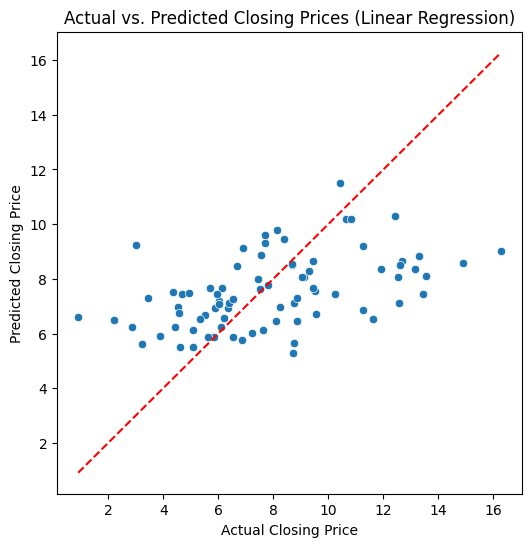

In [23]:
# Scatter Plot
# The red line represents the ideal prediction (y=x)
# If the model predictions were perfect, all points would lie on this line

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test.values, y=predictions)
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Closing Price")
plt.ylabel("Predicted Closing Price")
plt.title("Actual vs. Predicted Closing Prices (Linear Regression)")
plt.show()


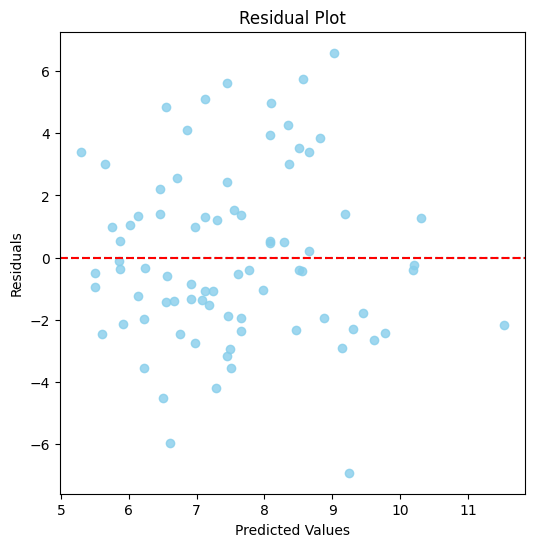

In [24]:
# Residual Plot
# The residuals should be randomly distributed around zero

plt.figure(figsize=(6, 6))
sns.residplot(x=predictions, y=y_test.values, color='skyblue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

----
### `b. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!`
----

In [31]:
intercept = round(lr_model.intercept_, 3)
co_eff = np.round(lr_model.coef_, 3)
print(f"Slope (coefficient): {co_eff}")
print(f"Intercept: {intercept}")

Slope (coefficient): [-1.244 -0.05   0.529]
Intercept: 7.388


----
### `c. Write out the model in equation form, being careful to handle the qualitative variables properly.`
----

In [32]:
from sympy import symbols, Eq

Price, Urban, US, Sales = symbols('Price Urban US Sales')
model_eq = intercept + (co_eff[0] * Price) + (co_eff[1] * Urban) + (co_eff[2] * US)
print(f"The linear model equation: {model_eq}")

evaluated_y = model_eq.subs([(Price, 3), (Urban, 1), (US, 1)])
print(f"When Price = 3, Urban = 1 and US = 1, y = {evaluated_y}")

The linear model equation: -1.244*Price + 0.529*US - 0.05*Urban + 7.388
When Price = 3, Urban = 1 and US = 1, y = 4.13500000000000


----
### `d. For which of the predictors can you reject the null hypothesis H_0 : β_j = 0?`
----

For the relationship between `Sales` and `Price`:
* **Null Hypothesis (H_0)**: There is no linear relationship between Price and Sales. As Price changes, Sales do not consistently increase or decrease. The coefficient for Price (β_Price) = zero
* **Alternative Hypothesis (H_a)**: There is a linear relationship between Price and Sales, which could be either positive or negative. The coefficient for Price is not zero.

So to prove this, we use **p-value**. The value as a result of p-test. If the resultant value is < 0.05, alternate hypothesis is accepted and null hypothesis is rejected else vice-versa.

In [ ]:
# %pip install statsmodels

In [35]:
import statsmodels.api as sm

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the full summary table
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 18 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        22:00:32   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

* **Price** (0.000): `Reject the null hypothesis`. Price is a statistically significant predictor of Sales.
* **Urban** (0.936): `Accept the null hypothesis`. Urban is not a statistically significant predictor of Sales in this model.
* **US** (0.000): `Reject the null hypothesis`. US is a statistically significant predictor of Sales.

----
### `e. On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.`
----

In [50]:
X_2 = df[['Price', 'US']]
y_2 = df['Sales']

In [51]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=42)   # 80-20 train-test split, random_state for reproducibility

print("X_train_2 shape:", X_train_2.shape)
print("X_test_2 shape:", X_test_2.shape)
print("y_train_2 shape:", y_train_2.shape)
print("y_test_2 shape:", y_test_2.shape)

X_train_2 shape: (320, 2)
X_test_2 shape: (80, 2)
y_train_2 shape: (320,)
y_test_2 shape: (80,)


In [52]:
x_train_scaled_2 = scaler.fit_transform(X_train_2)
x_test_scaled_2 = scaler.transform(X_test_2)

In [56]:
lr_model_2 = LinearRegression()
lr_model_2.fit(x_train_scaled_2, y_train_2)
lr_y_pred_2 = lr_model_2.predict(x_test_scaled_2)

lr_rmse_2 = root_mean_squared_error(y_test, lr_y_pred_2)
lr_mse_2 = mean_squared_error(y_test, lr_y_pred_2)
lr_r2_2 = r2_score(y_test, lr_y_pred_2)
lr_adjust_r2_2 = calculate_adjusted_r2(r2=lr_r2_2, n=400, p=2)

print(f"Root Mean Squared Error: {lr_rmse_2}")
print(f'Mean Squared Error: {round(lr_mse_2,2)}')
print(f'R-squared: {round(lr_r2_2, 2)*100 }%')
print(f'Adjusted R-squared: {round(lr_adjust_r2_2, 2)}')

Root Mean Squared Error: 2.7852123907372617
Mean Squared Error: 7.76
R-squared: 22.0%
Adjusted R-squared: 0.21


R-squared is increased while RMSE and MSE are decreased still the adjusted r-squared is equal indicating there is a slight improvement in removing statistically not significant feature `Urban`.

----
### `g. Using the model from (e), obtain 95 % confidence intervals for the coefficient(s).`
----

For Price,
* Coefficient:-0.0545
* 95% confidence interval is [-0.065, -0.044].

For Urban,
* Coefficient: -0.0219
* 95% confidence interval is [-0.556, 0.512].

For US,
* Coefficient: 1.2006
* 95% confidence interval is [0.691, 1.710].

----
### `h. Is there evidence of outliers or high leverage observations in the model from (e)?`
----

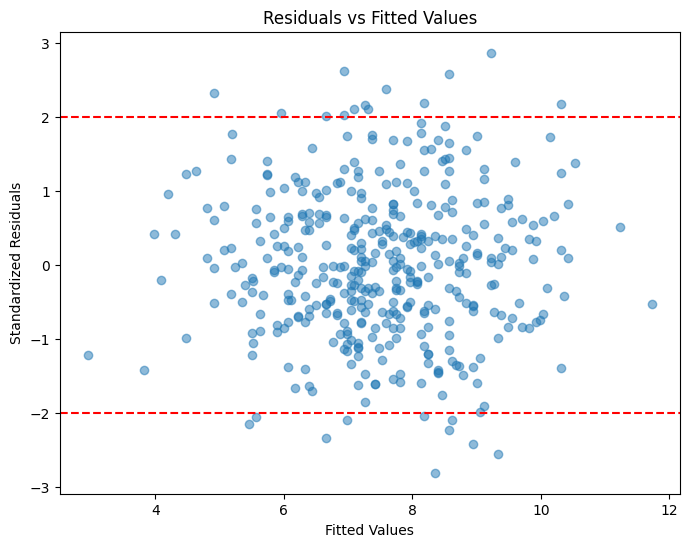

<Figure size 800x600 with 0 Axes>

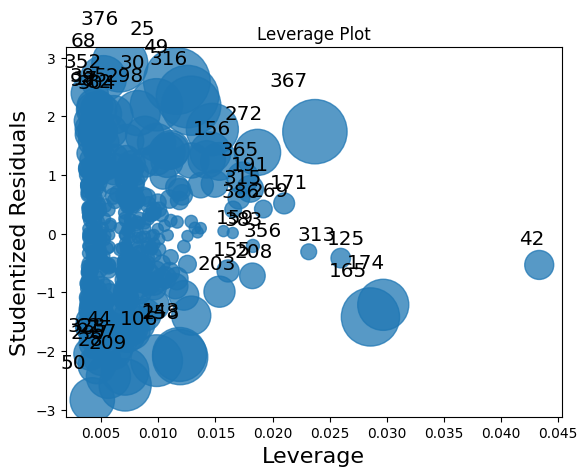

In [64]:
from statsmodels.graphics.regressionplots import influence_plot

X_2 = sm.add_constant(X_2)
model = sm.OLS(y, X_2).fit()

# Plot standardized residuals vs. fitted values to check for outliers
plt.figure(figsize=(8, 6))
plt.scatter(model.fittedvalues, model.get_influence().resid_studentized_internal, alpha=0.5)
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=2, color='red', linestyle='--')
plt.axhline(y=-2, color='red', linestyle='--')
plt.show()

# Plot leverage vs. standardized residuals to check for high-leverage points
plt.figure(figsize=(8, 6))
influence_plot(model)
plt.title('Leverage Plot')
plt.show()

*No Major outliers*

Overall Summary:
1. Cleaning Data - no duplicates, missing values, inconsistent data, totally clean data
2. Descriptive Statistical analysis checked and found advertising to be skewed, not going to include in training, so do nothing.
3. Confirmed advertising to be skewed and outliers in other features aren't more just less than 1.25%, so do nothing.
4. Encoded urban, shelveloc and us categories using label encoding. Shelveloc is not part of training so no problem in applying label encoding.
5. Chose X and y. Split 20% for testing and remaining for training. Trained the model using linear regression. Got R-squared and Adjusted R-squared of 21.
6. found intercept and coefficients of predictors and used them to build model equations.
7. Found P-test value to find most statistically significant predictors among the chosen predictor and trained a smaller model to find if removing unsignificant made any impact, showed a slightly better one.
8. found interval in which we are 95% confident that the true population coefficient lies.
9. Finally checked for if there is a presence of outliers in the smaller model but there are very few.